In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os 
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

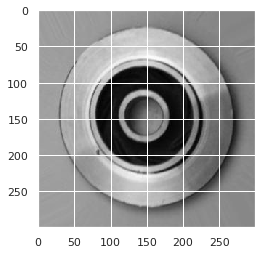

In [30]:
from PIL import Image, ImageDraw
img = Image.open("train_data/cast_def_0_0.jpeg")
plt.imshow(img)
plt.show()

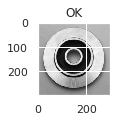

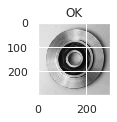

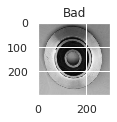

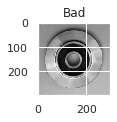

In [31]:
im1 = Image.open("train_data/cast_ok_0_147.jpeg")
im2 = Image.open("train_data/cast_ok_0_149.jpeg")
im3 = Image.open("train_data/cast_def_0_103.jpeg")
im4 = Image.open("train_data/cast_def_0_105.jpeg")

plt.subplot(1,4,1)
plt.imshow(im1)
plt.title("OK")
plt.show()

plt.subplot(1,4,2)
plt.imshow(im2)
plt.title("OK")
plt.show()

plt.subplot(1,4,3)
plt.imshow(im3)
plt.title("Bad")
plt.show()

plt.subplot(1,4,4)
plt.imshow(im4)
plt.title("Bad")
plt.show()

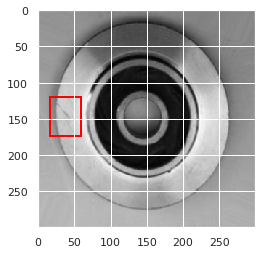

In [33]:
d = ImageDraw.Draw(im3)
d.rectangle(xy=[(15, 120), (60, 175)], outline="red", width=3)
plt.imshow(im3)

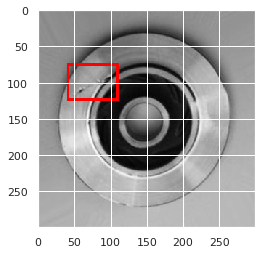

In [36]:
d = ImageDraw.Draw(im4)
d.rectangle(xy=[(40, 75), (110, 125)], outline="red", width=3)
plt.imshow(im4)

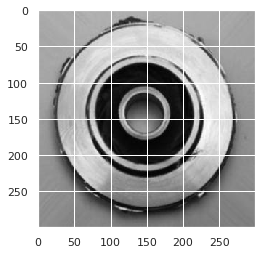

In [38]:
im5 = Image.open("train_data/cast_def_0_131.jpeg")
plt.imshow(im5)

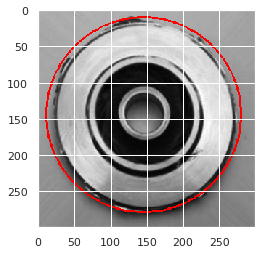

In [39]:
d = ImageDraw.Draw(im5)
d.ellipse([(10,10), (280,280)], outline="red", width=3)
plt.imshow(im5)
plt.show()

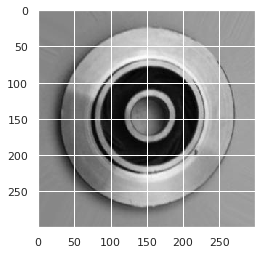

In [40]:
new_img = img.transpose(Image.FLIP_LEFT_RIGHT)#左右反転。上下反対にする場合はFLIP_TOP_BOTTOM
plt.imshow(new_img)
plt.show()

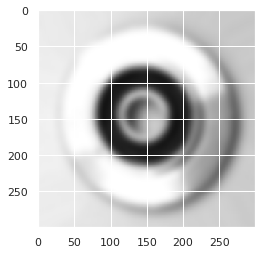

In [41]:
from PIL import ImageFilter
temp_img = img.point(lambda x: x * 1.5)#コントラスト調整
new_im = temp_img.filter(ImageFilter.GaussianBlur(5))#ぼかしの設定
plt.imshow(new_im)
plt.show()

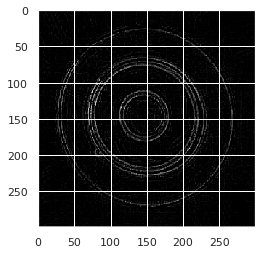

In [42]:
new_img = img.filter(ImageFilter.FIND_EDGES)
plt.imshow(new_img)
plt.show()

In [86]:
files = os.listdir("./")
print(files)
print(type(files))

['.DS_Store', 'train_data.zip']
<class 'list'>


In [87]:
import zipfile
def unzip_dataset(INPATH, OUTPATH):
    """
    INPATH:解凍したいファイルが入っているパス
    OUTPATH：解凍したい先のパス
    
    Returns:
     解凍したファイル達
    """
    
    with zipfile.ZipFile(INPATH) as zf:
        zf.extractall(OUTPATH)
        
# unzip_dataset(INPATH="./train_data.zip", OUTPATH="./")
# print(os.listdir("./"))

['.DS_Store', '__MACOSX', 'train_data', 'train_data.zip']


In [88]:
with zipfile.ZipFile('./train_data.zip') as existing_zip:
            print(existing_zip.namelist()[0:5])

['train_data/', 'train_data/cast_def_0_335.jpeg', '__MACOSX/', '__MACOSX/train_data/', '__MACOSX/train_data/._cast_def_0_335.jpeg']


In [92]:
print(os.listdir('./input_data'))

['.DS_Store', 'train', 'val']


In [94]:
print(os.listdir("./input_data/train"))

['.DS_Store', 'ng', 'ok']


In [95]:
img_ok_files = os.listdir("./input_data/train/ok/")
img_ng_files = os.listdir("./input_data/train/ng/")

print(len(img_ok_files))
print(len(img_ng_files))

print(len(set(img_ok_files)))
print(len(set(img_ng_files)))

100
150
100
150


In [96]:
from torchvision import transforms

#画像の前処理

data_transforms = {
    "train" : transforms.Compose([
        transforms.Resize(256),#画像のサイズの設定
        transforms.RandomHorizontalFlip(p=0.5),#水平方向へのランダム反転
        transforms.ToTensor(),#テンソル化（先に画像データのサイズの設定）
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),#正規化
    ]),
    "val" : transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])
}

print(data_transforms)

{'train': Compose(
    Resize(size=256, interpolation=PIL.Image.BILINEAR)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
), 'val': Compose(
    Resize(size=256, interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)}


In [113]:
print(len(img_ok_files[:50]))
print(len(img_ng_files[:75]))
print(len(img_ok_files[50:]))
print(len(img_ng_files[75:]))

50
75
50
75


In [120]:
from torchvision import datasets
image_dataset = {
    "train" : datasets.ImageFolder("./input_data/train/", data_transforms["train"]),
    "val" : datasets.ImageFolder("./input_data/val/", data_transforms["val"])
}
print(image_dataset)

{'train': Dataset ImageFolder
    Number of datapoints: 125
    Root location: ./input_data/train/
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           ), 'val': Dataset ImageFolder
    Number of datapoints: 125
    Root location: ./input_data/val/
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )}


In [122]:
import torch
image_dataloader = {
    'train': torch.utils.data.DataLoader(image_dataset['train'], batch_size=4,shuffle=True, num_workers=0, drop_last=True),
    'val': torch.utils.data.DataLoader(image_dataset['val'], batch_size=4,shuffle=False, num_workers=0, drop_last=True),
}
